### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Database

In [2]:
# Importing Database
df = pd.read_csv('Subject_1-Summer products CSV.csv')

# Checking null values
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [3]:
# Dropping columns that won't be used
df.drop(columns=['title', 'merchant_profile_picture', 'theme', 'currency_buyer', 'merchant_name', 'merchant_info_subtitle'], inplace=True)

In [4]:
pd.set_option('display.max_columns', None)
print(df)

                                             title_orig  price  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1      Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2     2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3     Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4     Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   
...                                                 ...    ...           ...   
1568  New Fashion Women Bohemia Dandelion Print Tee ...   6.00             9   
1569  10 Color Women Summer Shorts Lace Up Elastic W...   2.00            56   
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...   5.00            19   
1571  Fashion Women Summer Sleeveless Dresses V Neck...  13.00            11   
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...   7.00             6   

      units_sold  uses_ad_boosts  ratin

In [5]:
# Checking duplicated product id
double_product_id = df['product_id'].value_counts().reset_index()

double_product_id.head()

,product_id,count
0,5e16cb87e6dd7c03be24b28a,3
1,5e9932cab3eafb25c00ba79f,3
2,5e93d60ebc5446aedde50c50,3
3,5ea91e4d29b81241e1d43b27,3
4,5cde56ea6bbbd86b1cbab4a8,3


In [6]:
# Joining the original dataframe with the dataframe that shows duplicated id
df = df.merge(right=double_product_id, how='left')

In [7]:
# Excluding duplicated product id 
df = df[~((df['count'] > 1) & (~df['urgency_text'].isna()))]

df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,crawl_month,count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,2020-08,1
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,2020-08,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2020-08,1
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,2020-08,2
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,NaN,NaN,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,2020-08,1


In [8]:
# Checking again duplicated product id
df['product_id'].value_counts()

product_id
5eeef4c4066647a9388a8ac2    2
5c80e8a150c63d28c67b8f14    2
5e940265ea3640c9ca0353aa    2
5d78eb19cc404c03393c83b5    2
5ebe0ead593b960eb1c82d0b    2
                           ..
5c3c203632a6a40bc2a9c5d9    1
5adf04b7f3bcca2a870d2104    1
5e12c01191235958ecdd6285    1
5e9d28099fb1a6c87938eb06    1
5e857321f53c3d2d8f25e7ed    1
Name: count, Length: 1341, dtype: int64

In [9]:
# Dropping duplicated product id
df.drop_duplicates(inplace=True)

In [10]:
# Checking for the last time duplicated product id
df['product_id'].value_counts()

product_id
5e9ae51d43d6a96e303acdb0    1
5e76d7f0370e9deae7cadf87    1
5e683f1cee70ce1cf4a91d2a    1
5d11e3e51bb88e735249cbbb    1
5e6b2dfdc8a3db48b223b701    1
                           ..
5b6021aee07ac6197df2d097    1
56ab07ee59a6820f0a29f468    1
5cc2c7e11f6e1263c6169d59    1
5ad714f9c4791873311ac156    1
5e857321f53c3d2d8f25e7ed    1
Name: count, Length: 1341, dtype: int64

In [11]:
# Dropping rating_count column
df.drop(columns=['rating_count'], axis=1, inplace=True)
df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,crawl_month,count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,2020-08,1
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,2020-08,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2020-08,1
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,2020-08,2
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,NaN,NaN,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,2020-08,1


In [12]:
# After dropping rating_count column, the rating_count_product was created
df['rating_count_product'] = df['rating_one_count'] + df['rating_two_count'] + df['rating_three_count'] + df['rating_four_count'] + df['rating_five_count']

df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,crawl_month,count,rating_count_product
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,2020-08,1,54.0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,2020-08,1,6135.0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2020-08,1,14.0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,2020-08,2,579.0
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,NaN,NaN,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,2020-08,1,1.0


In [13]:
# All the tags was put in lower string
df['tags'] = df['tags'].str.lower()

In [14]:
# Defining gender
import re

term_fem = {'woman', 'women', 'womens', 'womans', 'girl', 'girls', 'lady', 'ladies', 'female', 'feminine', "women's fashion", 'unisex', 'womemstop', 'bikini', 'femaletshirt', 'pregnantshirt', 'dress', 'bodyshaperwomen'}
term_masc = {'man', 'men', 'mens', 'boy', 'boys', 'gentleman', 'gentlemen', 'male', 'masculine', "men's fashion", 'unisex', 'mensummertshirt', 'bermudashort'}

def categorizar_genero(tags):
    if not isinstance(tags, str):
        return 'other'
    
    tags_list = [tag.strip().lower() for tag in re.split(r"[,\s']+", tags) if tag.strip()]
    
    tem_feminino = any(tag in term_fem for tag in tags_list)
    tem_masculino = any(tag in term_masc for tag in tags_list)

    if tem_feminino and tem_masculino:
        return 'unisex'
    elif tem_feminino:
        return 'female'
    elif tem_masculino:
        return 'male'
    else:
        return 'unisex'

df['gender_category'] = df['tags'].apply(categorizar_genero)


In [15]:
# Identifying the marjority color from the pictures
import requests
from PIL import Image
from io import BytesIO
from collections import Counter
import webcolors

def nome_cor_proxima(rgb):
    try:
        return webcolors.rgb_to_name(rgb)
    except ValueError:
        def distancia(cor1, cor2):
            return sum((e1 - e2) ** 2 for e1, e2 in zip(cor1, cor2))

        nomes_cores = webcolors.CSS3_HEX_TO_NAMES
        cores_rgb = {webcolors.hex_to_rgb(hex): nome for hex, nome in nomes_cores.items()}
        cor_mais_proxima = min(cores_rgb.keys(), key=lambda cor: distancia(rgb, cor))
        return cores_rgb[cor_mais_proxima]

def cor_dominante_nome(url):
    try:
        resposta = requests.get(url, timeout=10)
        img = Image.open(BytesIO(resposta.content)).convert('RGB')
        img = img.resize((100, 100))
        cores = img.getdata()
        cor_rgb = Counter(cores).most_common(1)[0][0]
        return nome_cor_proxima(cor_rgb)
    except:
        return None


mascara = df['product_color'].isna()
df.loc[mascara, 'dominant_color_name'] = df.loc[mascara, 'product_picture'].apply(cor_dominante_nome)



In [16]:
# Bringing the final color between the original color column and the color column created
def newcolor(row):
    if pd.notnull(row['product_color']) and pd.isnull(row['dominant_color_name']):
        return row['product_color']
    elif pd.isnull(row['product_color']) and pd.notnull(row['dominant_color_name']):
        return row['dominant_color_name']
    else:
        return 'no_color'

df['final_color'] = df.apply(newcolor, axis=1)


In [17]:
# Normalizing the color

def normalize_color(color):
    color = str(color).lower()

    if 'blue' in color:
        return 'blue'
    elif 'red' in color:
        return 'red'
    elif 'green' in color:
        return 'green'
    elif 'pink' in color:
        return 'pink'
    elif 'black' in color:
        return 'black'
    elif 'white' in color:
        return 'white'
    elif 'yellow' in color:
        return 'yellow'
    elif 'purple' in color:
        return 'purple'
    elif 'grey' in color or 'gray' in color:
        return 'gray'
    elif 'orange' in color:
        return 'orange'
    elif 'brown' in color or 'coffee' in color:
        return 'brown'
    elif 'beige' in color or 'khaki' in color:
        return 'beige'
    elif 'multicolor' in color or 'floral' in color:
        return 'multicolor'
    else:
        return 'other'



In [18]:
# Applying the function
df['standard_color'] = df['final_color'].apply(normalize_color)

In [19]:
# Dropping the rest of the columns that won't be used
df.drop(columns=['dominant_color_name','final_color', 'product_color', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'], inplace=True)

df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,crawl_month,count,rating_count_product,gender_category,standard_color
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,0,0,0,0,"summer,fashion,womenunderwearsuit,printedpajam...",M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,2020-08,1,54.0,female,white
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,0,0,0,0,"mini,womens dresses,summer,patchwork,fashion d...",XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,2020-08,1,6135.0,female,green
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,0,0,0,0,"summer,cardigan,women beachwear,chiffon,sexy w...",XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2020-08,1,14.0,female,other
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,0,0,0,0,"summer,shorts,cotton,cotton t shirt,sleeve,pri...",M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,2020-08,2,579.0,female,black
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,0,0,0,0,"deep v-neck,summer,plus size,spaghetti strap,o...",Size-XS,1,Livraison standard,1,0,40,50,NaN,NaN,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,2020-08,1,1.0,female,blue


In [20]:
# Rename the color column
df.rename(columns={'standard_color':'color'}, inplace=True)

df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,crawl_month,count,rating_count_product,gender_category,color
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,0,0,0,0,"summer,fashion,womenunderwearsuit,printedpajam...",M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,2020-08,1,54.0,female,white
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,0,0,0,0,"mini,womens dresses,summer,patchwork,fashion d...",XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,2020-08,1,6135.0,female,green
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,0,0,0,0,"summer,cardigan,women beachwear,chiffon,sexy w...",XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2020-08,1,14.0,female,other
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,0,0,0,0,"summer,shorts,cotton,cotton t shirt,sleeve,pri...",M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,2020-08,2,579.0,female,black
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,0,0,0,0,"deep v-neck,summer,plus size,spaghetti strap,o...",Size-XS,1,Livraison standard,1,0,40,50,NaN,NaN,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,2020-08,1,1.0,female,blue


In [21]:
# Categorizing the clothes 
def categorizar_produto(name):
    name = str(name).lower()

    if any(word in name for word in ['sleeve', 't shirt', 't-shirt', 'shirt', 'v neck', 'v-neck']):
        return 't-shirts'
    elif any(word in name for word in ['dress']):
        return 'dress'
    elif any(word in name for word in ['legging']):
        return 'legging'
    elif any(word in name for word in ['pants']):
        return 'pants'
    elif any(word in name for word in ['bikini']):
        return 'bikini'
    elif any(word in name for word in ['shorts']):
        return 'shorts'
    elif any(word in name for word in ['swim']):
        return 'swimsuit'
    elif any(word in name for word in ['crop']):
        return 'crop'
    else:
        return 'others'

In [22]:
# Applying the function 
df['category'] = df['title_orig'].apply(categorizar_produto)

## Business Question

### Shipping x Selling

In [23]:
where = ~df['color'].isin(['other', 'multicolor'])

new_df = df[where]

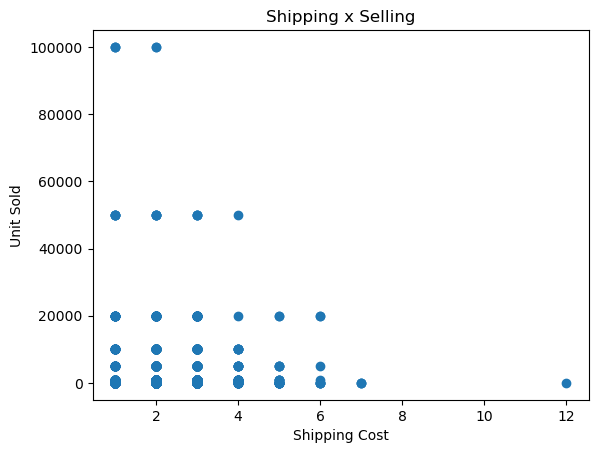

In [24]:
plt.scatter(new_df['shipping_option_price'],
            new_df['units_sold']) 
plt.xlabel('Shipping Cost')
plt.ylabel('Unit Sold')
plt.title('Shipping x Selling')
plt.show()

### Category by Unit Sold

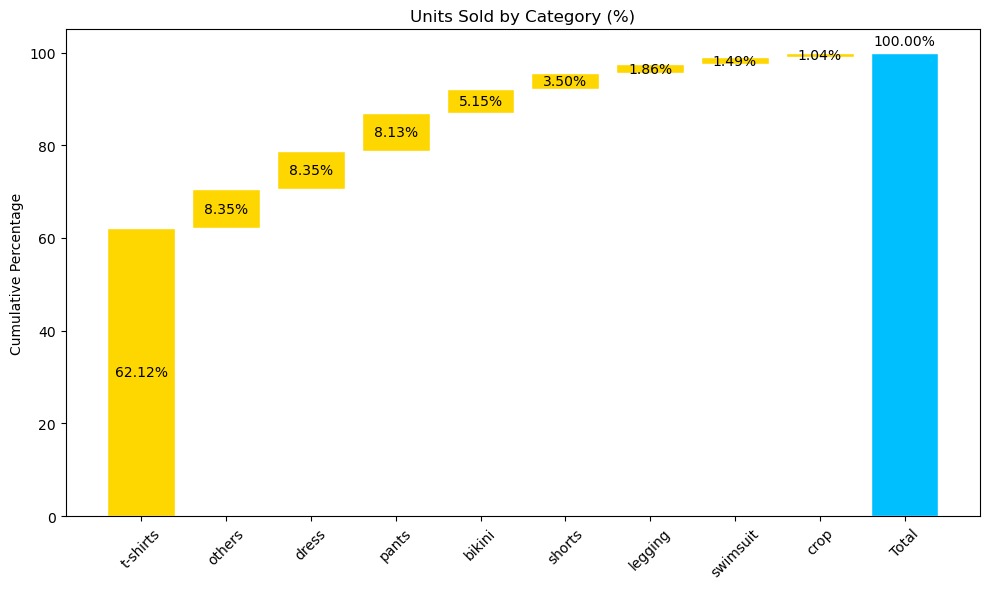

In [25]:
# Example data (replace with your actual dataframe)
category_counts = df['category'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Organize categories and values
labels = category_counts.index.tolist()
values = category_counts.values

# Calculate cumulative values
starts = np.zeros(len(values))
starts[1:] = np.cumsum(values[:-1])  # start point of each bar
ends = starts + values

# Plot waterfall
fig, ax = plt.subplots(figsize=(10, 6))

# Intermediate bars
for i in range(len(values)):
    ax.bar(labels[i], values[i], bottom=starts[i], color='gold', edgecolor='white')
    ax.text(i, starts[i] + values[i]/2, f'{values[i]:.2f}%', ha='center', va='center', fontsize=10, color='black')

# Total bar
total = values.sum()
ax.bar('Total', total, bottom=0, color='deepskyblue', edgecolor='white')
ax.text(len(labels), total + 1, f'{total:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Layout
plt.title('Units Sold by Category (%)')
plt.ylabel('Cumulative Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average Unit Sold by Marketing Strategy

urgency_text
Quantité limitée !                  269
Réduction sur les achats en gros      1
Name: count, dtype: int64
=== Comparison of average sales ===
Have Banner: 5700.814814814815
No Banner: 4598.775910364146

Have AD: 4552.996575342466
No AD: 5027.158520475561

=== Urgent banners x Average number of ads sold  ===
ad_boosted         False        True 
has_urgency                          
False        4789.652961  4348.120950
True         5996.308725  5336.942149
Average number of overall sales: 4820.66
<class 'pandas.core.frame.DataFrame'>
ad_boosted         False        True 
has_urgency                          
False        4789.652961  4348.120950
True         5996.308725  5336.942149


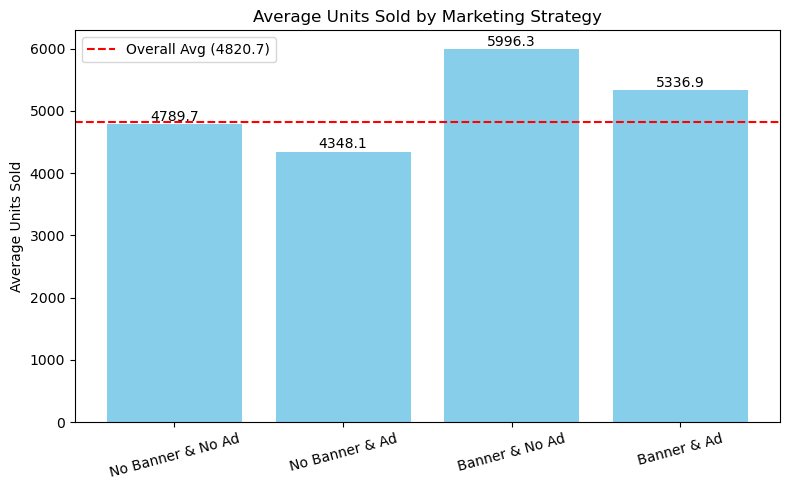

In [26]:
# Extract only data with urgency_text (i.e., rows with has_urgency_banner)
urgent_df = df[df['urgency_text'].notna()]

# List of statements (unique text and number of occurrences)
urgency_counts = urgent_df['urgency_text'].value_counts()

print(urgency_counts)

# has urgency banner（True/False）
df['has_urgency'] = df['urgency_text'].notna()

# Average number of sales per group
print("=== Comparison of average sales ===")
print("Have Banner:", df[df['has_urgency']]['units_sold'].mean())
print("No Banner:", df[~df['has_urgency']]['units_sold'].mean())

print("\nHave AD:", df[df['uses_ad_boosts'] == 1]['units_sold'].mean())
print("No AD:", df[df['uses_ad_boosts'] == 0]['units_sold'].mean())

# Classified into 4 groups
df['ad_boosted'] = df['uses_ad_boosts'] == 1

grouped = df.groupby(['has_urgency', 'ad_boosted'])['units_sold'].mean().unstack()
print("\n=== Urgent banners x Average number of ads sold  ===")
print(grouped)

# Average overall sales volume
average_units_sold = df['units_sold'].mean()

print("Average number of overall sales:", round(average_units_sold, 2))

grouped = df.groupby(['has_urgency', 'ad_boosted'])['units_sold'].mean().unstack()
print(type(grouped))
print(grouped.head())

# Create flags for both marketing strategies
df['has_urgency'] = df['urgency_text'].notna()
df['ad_boosted'] = df['uses_ad_boosts'] == 1

# Group by both strategies and calculate average units sold
grouped = df.groupby(['has_urgency', 'ad_boosted'])['units_sold'].mean().reset_index()

# Add a readable group label
grouped['group'] = grouped.apply(lambda row: 
    f"{'Banner' if row['has_urgency'] else 'No Banner'} & {'Ad' if row['ad_boosted'] else 'No Ad'}", axis=1)

# Get overall average units sold
overall_avg = df['units_sold'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['group'], grouped['units_sold'], color='skyblue')

# Draw overall average line
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Avg ({overall_avg:.1f})')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}", ha='center', va='bottom')

plt.title("Average Units Sold by Marketing Strategy")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()
plt.show()
 